# Bidimensional discrete space Fourier transform
---
- Author: Diego Inácio
- GitHub: [github.com/diegoinacio](https://github.com/diegoinacio)
- Notebook: [2D_discrete_fourier_transform.ipynb](https://github.com/diegoinacio/computer-vision-notebooks/blob/master/Computer-Vision-Fundamentals/2D_discrete_fourier_transform.ipynb)
---
Naive implementation of *DSFT* for bidimensional space. 

$O(n²)$ >> *The running time will be quite long*

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import imageio

from _utils import *

In [2]:
image = imageio.imread('../_data/cameraman.png')
s = 4; image = image[::s, ::s]/255
N1, N2 = image.shape

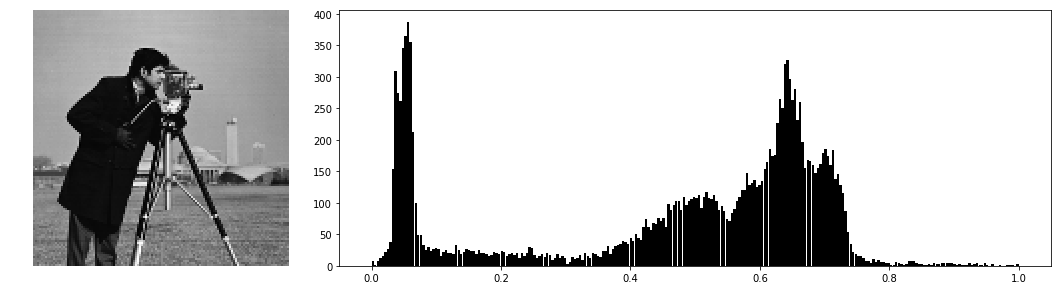

In [3]:
histogram(image, interval=[0, 1])

## 1. Discrete space Fourier transform
---
Transforming from spatial to frequency domain using *Discrete Fourier Transform*, defined by:

$$ \large
X(\omega_1,\omega_2)=\sum_{n_1=0}^{N_1-1}\sum_{n_2=0}^{N_2-1}x(n_1,n_2)e^{-j2\pi\left(\frac{\omega_1 n_1}{N_1}+\frac{\omega_2 n_2}{N_2}\right)}
$$

In [4]:
def DFT2D(x, shift=True):
    '''
    Discrete space fourier transform
    x: Input matrix
    '''
    pi2 = 2*np.pi
    N1, N2 = x.shape
    X = np.zeros((N1, N2), dtype=np.complex64)
    n1, n2 = np.mgrid[0:N1, 0:N2]
    for w1 in range(N1):
        for w2 in range(N2):
            j2pi = np.zeros((N1, N2), dtype=np.complex64)
            j2pi.imag = pi2*(w1*n1/N1 + w2*n2/N2)
            X[w1, w2] = np.sum(x*np.exp(-j2pi))
    if shift:
        X = np.roll(X, N1//2, axis=0)
        X = np.roll(X, N2//2, axis=1)
    return X

In [5]:
%%time
IMAGE = DFT2D(image)

CPU times: user 48 s, sys: 607 ms, total: 48.6 s
Wall time: 50.6 s


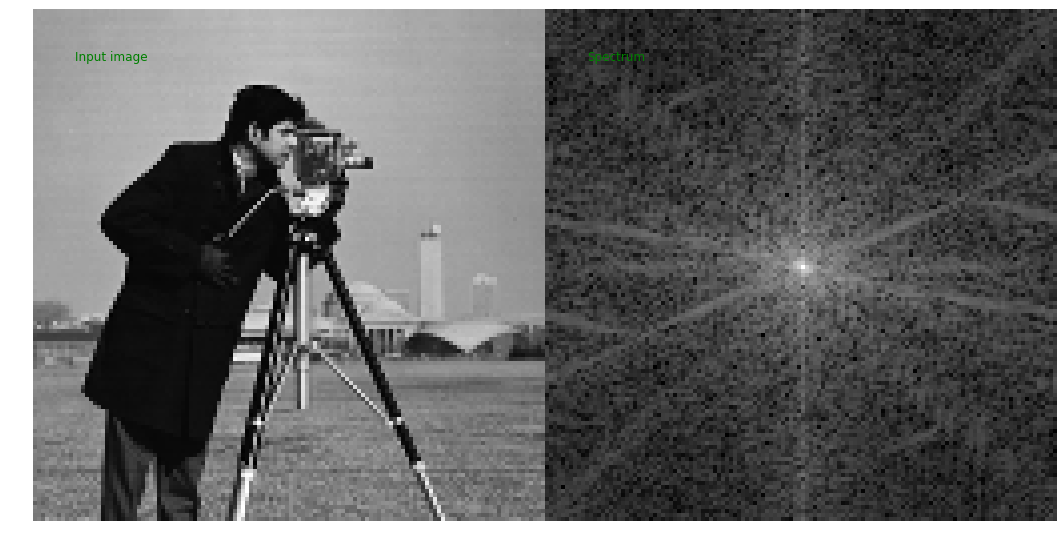

In [6]:
xX = np.array([image, np.log10(1 + abs(IMAGE))])
panel(xX, [2, 1], text_color='green',
      texts=['Input image', 'Spectrum'])

## 2. Inverse discrete space Fourier transform
---
Transforming from frequency to spatial domain using *Inverse Discrete Fourier Transform*, defined by:

$$ \large
x(n_1,n_2)=\frac{1}{N_1 N_2}\sum_{k_1=0}^{N_1-1}\sum_{k_2=0}^{N_2-1}X(k_1,k_2)e^{j2\pi\left(\frac{n_1 k_1}{N_1}+\frac{n_2 k_2}{N_2}\right)}
$$

In [7]:
def iDFT2D(X, shift=True):
    '''
    Inverse discrete space fourier transform
    X: Complex matrix
    '''
    pi2 = 2*np.pi
    N1, N2 = X.shape
    x = np.zeros((N1, N2))
    k1, k2 = np.mgrid[0:N1, 0:N2]
    if shift:
        X = np.roll(X, -N1//2, axis=0)
        X = np.roll(X, -N2//2, axis=1)
    for n1 in range(N1):
        for n2 in range(N2):
            j2pi = np.zeros((N1, N2), dtype=np.complex64)
            j2pi.imag = pi2*(n1*k1/N1 + n2*k2/N2)
            x[n1, n2] = abs(np.sum(X*np.exp(j2pi)))
    return 1/(N1*N2)*x

In [8]:
%%time
image_ = iDFT2D(IMAGE)

CPU times: user 41.1 s, sys: 172 ms, total: 41.3 s
Wall time: 41.9 s


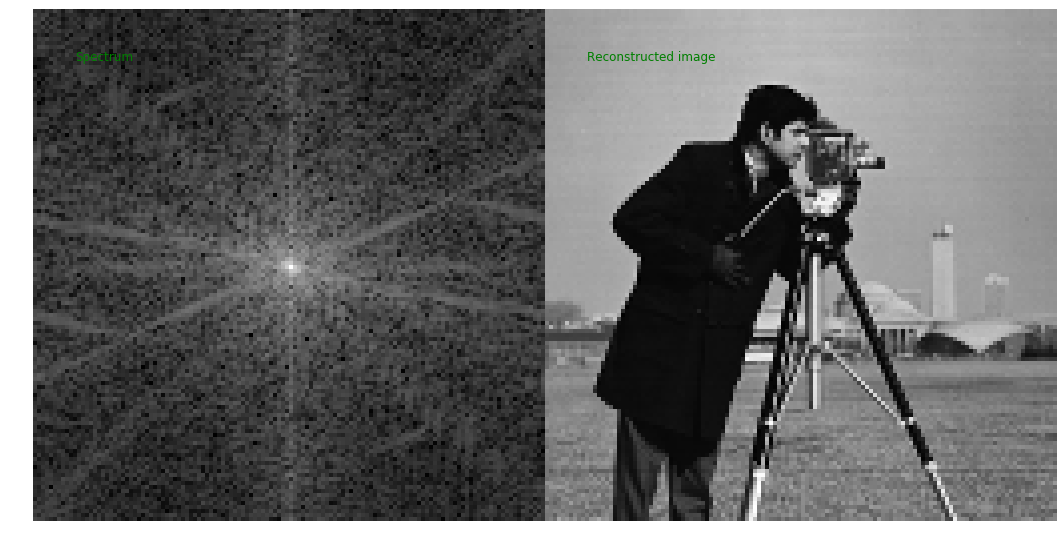

In [9]:
Xx_ = np.array([np.log10(1 + abs(IMAGE)), image_])
panel(Xx_, [2, 1], text_color='green',
      texts=['Spectrum', 'Reconstructed image'])

## 3. Spatial Frequency Filtering
---
Gaussian filtering, defined by the multiplication in frequency domain between the filter $H$ and the spectrum $X$.

$$ \large
G(u,v)=H(u,v)X(u,v)
$$

where:

$$ \large
H(u,v)=\frac{1}{2\pi \sigma^2}e^{-\frac{u^2+v^2}{2\sigma^2}}
$$

In [10]:
N1, N2 = image.shape
u, v = np.mgrid[-N1//2:N1//2, -N2//2:N2//2]/max(N1, N2)

sigma = 0.2
H = 1/(2*np.pi*sigma**2)*np.exp(-(u**2 + v**2)/(2*sigma**2))

In [11]:
%%time
image__ = iDFT2D(H*IMAGE)

CPU times: user 42.2 s, sys: 59 ms, total: 42.2 s
Wall time: 42.2 s


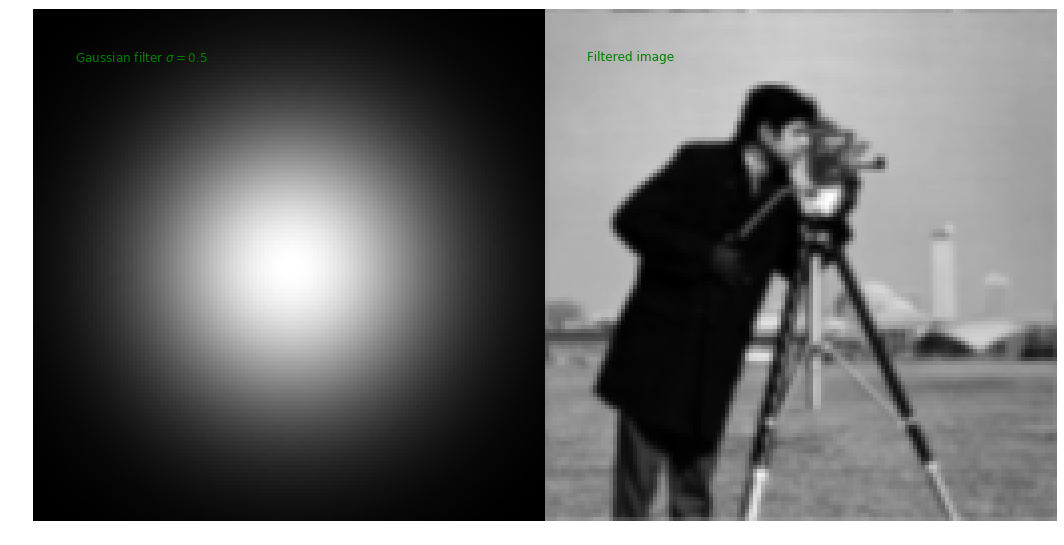

In [12]:
Hx__ = np.array([H, image__])
panel(Hx__, (2, 1), text_color='green',
      texts=[r'Gaussian filter $\sigma=0.5$', 'Filtered image'])

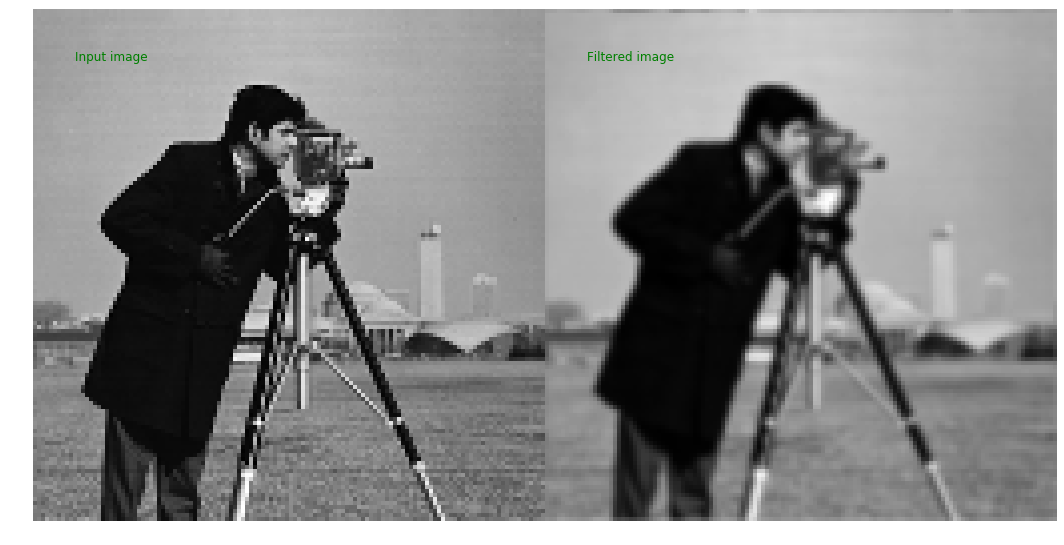

In [13]:
xx__ = np.array([image, image__])
panel(xx__, (2, 1), text_color='green',
      texts=['Input image', 'Filtered image'])